# Movie Recommendation

In [81]:
import pandas as pd
import numpy as np

In [82]:
credits_df = pd.read_csv('tmdb_5000_credits.csv')
movies_df = pd.read_csv('tmdb_5000_movies.csv')

print(credits_df.shape, movies_df.shape)

(4803, 4) (4803, 20)


In [83]:
movies_df.head(2)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500


In [84]:
movies_df.columns

Index(['budget', 'genres', 'homepage', 'id', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'vote_average',
       'vote_count'],
      dtype='object')

In [85]:
credits_df.head()

,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [86]:
credits_df.columns

Index(['movie_id', 'title', 'cast', 'crew'], dtype='object')

In [87]:
credits_df.columns = ['id', 'movie_title', 'cast', 'crew']
credits_df.head()

,id,movie_title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [88]:
movies_df = movies_df.merge(credits_df, on='id')
movies_df.head(2)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,movie_title,cast,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."


In [89]:
features = ['movie_title', 'cast', 'crew', 'keywords', 'genres']
movies_df[features].head()

,movie_title,cast,crew,keywords,genres
0,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de...","[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...","[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam..."
1,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de...","[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...","[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""..."
2,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de...","[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...","[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam..."
3,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de...","[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...","[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam..."
4,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de...","[{""id"": 818, ""name"": ""based on novel""}, {""id"":...","[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam..."


In [90]:
movies_df[features].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   movie_title  4803 non-null   object
 1   cast         4803 non-null   object
 2   crew         4803 non-null   object
 3   keywords     4803 non-null   object
 4   genres       4803 non-null   object
dtypes: object(5)
memory usage: 187.7+ KB


In [91]:
import json

list2=[]
for i in movies_df['keywords']:
    list1 = []
    i = json.loads(i)
    for j in i[:3]:
        list1.append(j['name'])
    list2.append(list1)
movies_df['keywords'] = list2

list2=[]
for i in movies_df['genres']:
    list1 = []
    i = json.loads(i)
    for j in i[:3]:
        list1.append(j['name'])
    list2.append(list1)
movies_df['genres'] = list2

list2=[]
for i in movies_df['cast']:
    list1 = []
    i = json.loads(i)
    for j in i[:3]:
        list1.append(j['character'])
    list2.append(list1)
movies_df['cast'] = list2

In [92]:
movies_df[features].head()

,movie_title,cast,crew,keywords,genres
0,Avatar,"[Jake Sully, Neytiri, Dr. Grace Augustine]","[{""credit_id"": ""52fe48009251416c750aca23"", ""de...","[culture clash, future, space war]","[Action, Adventure, Fantasy]"
1,Pirates of the Caribbean: At World's End,"[Captain Jack Sparrow, Will Turner, Elizabeth ...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de...","[ocean, drug abuse, exotic island]","[Adventure, Fantasy, Action]"
2,Spectre,"[James Bond, Blofeld, Madeleine]","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de...","[spy, based on novel, secret agent]","[Action, Adventure, Crime]"
3,The Dark Knight Rises,"[Bruce Wayne / Batman, Alfred Pennyworth, Jame...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de...","[dc comics, crime fighter, terrorist]","[Action, Crime, Drama]"
4,John Carter,"[John Carter, Dejah Thoris, Sola]","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de...","[based on novel, mars, medallion]","[Action, Adventure, Science Fiction]"


In [93]:
movies_df.crew[:1].values

array(['[{"credit_id": "52fe48009251416c750aca23", "department": "Editing", "gender": 0, "id": 1721, "job": "Editor", "name": "Stephen E. Rivkin"}, {"credit_id": "539c47ecc3a36810e3001f87", "department": "Art", "gender": 2, "id": 496, "job": "Production Design", "name": "Rick Carter"}, {"credit_id": "54491c89c3a3680fb4001cf7", "department": "Sound", "gender": 0, "id": 900, "job": "Sound Designer", "name": "Christopher Boyes"}, {"credit_id": "54491cb70e0a267480001bd0", "department": "Sound", "gender": 0, "id": 900, "job": "Supervising Sound Editor", "name": "Christopher Boyes"}, {"credit_id": "539c4a4cc3a36810c9002101", "department": "Production", "gender": 1, "id": 1262, "job": "Casting", "name": "Mali Finn"}, {"credit_id": "5544ee3b925141499f0008fc", "department": "Sound", "gender": 2, "id": 1729, "job": "Original Music Composer", "name": "James Horner"}, {"credit_id": "52fe48009251416c750ac9c3", "department": "Directing", "gender": 2, "id": 2710, "job": "Director", "name": "James Cam

In [94]:
def get_director(crew):
    crew = json.loads(crew)
    for i in crew:
        if i['job'] == 'Director':
            return i['name']
    return np.nan

In [95]:
movies_df['director'] = movies_df['crew'].apply(get_director)
features.remove('crew')
features.append('director')
movies = movies_df[features]

In [96]:
movies.head()

,movie_title,cast,keywords,genres,director
0,Avatar,"[Jake Sully, Neytiri, Dr. Grace Augustine]","[culture clash, future, space war]","[Action, Adventure, Fantasy]",James Cameron
1,Pirates of the Caribbean: At World's End,"[Captain Jack Sparrow, Will Turner, Elizabeth ...","[ocean, drug abuse, exotic island]","[Adventure, Fantasy, Action]",Gore Verbinski
2,Spectre,"[James Bond, Blofeld, Madeleine]","[spy, based on novel, secret agent]","[Action, Adventure, Crime]",Sam Mendes
3,The Dark Knight Rises,"[Bruce Wayne / Batman, Alfred Pennyworth, Jame...","[dc comics, crime fighter, terrorist]","[Action, Crime, Drama]",Christopher Nolan
4,John Carter,"[John Carter, Dejah Thoris, Sola]","[based on novel, mars, medallion]","[Action, Adventure, Science Fiction]",Andrew Stanton


In [97]:
def clean_data(row):
    if isinstance(row, list):
        return [str.lower(i.replace(' ', ' ')) for i in row]
    else:
        if isinstance(row, str):
            return str.lower(row.replace(' ', ' '))
        else: return ''

In [98]:
for feature in features:
    movies[feature] = movies[feature].apply(clean_data)
movies[features]

<ipython-input-98-f189c24aa0a6>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies[feature] = movies[feature].apply(clean_data)


,movie_title,cast,keywords,genres,director
0,avatar,"[jake sully, neytiri, dr. grace augustine]","[culture clash, future, space war]","[action, adventure, fantasy]",james cameron
1,pirates of the caribbean: at world's end,"[captain jack sparrow, will turner, elizabeth ...","[ocean, drug abuse, exotic island]","[adventure, fantasy, action]",gore verbinski
2,spectre,"[james bond, blofeld, madeleine]","[spy, based on novel, secret agent]","[action, adventure, crime]",sam mendes
3,the dark knight rises,"[bruce wayne / batman, alfred pennyworth, jame...","[dc comics, crime fighter, terrorist]","[action, crime, drama]",christopher nolan
4,john carter,"[john carter, dejah thoris, sola]","[based on novel, mars, medallion]","[action, adventure, science fiction]",andrew stanton
...,...,...,...,...,...
4798,el mariachi,"[el mariachi, bigotón, mauricio (moco)]","[united states–mexico barrier, legs, arms]","[action, crime, thriller]",robert rodriguez
4799,newlyweds,"[buzzy, linda, marsha]",[],"[comedy, romance]",edward burns
4800,"signed, sealed, delivered","[oliver o’toole, shane mcinerney, rita haywith]","[date, love at first sight, narration]","[comedy, drama, romance]",scott smith
4801,shanghai calling,"[sam, amanda, donald]",[],[],daniel hsia


In [99]:
def create_soup(features):
    return features['movie_title']+' ' +features['director']+' '+\
            ' '.join(features['keywords']) + ' ' + ' '.join(features['cast']) +\
            ' '.join(features['genres'])


movies["soup"] = movies.apply(create_soup, axis=1)
print(movies["soup"].head())

0    avatar james cameron culture clash future spac...
1    pirates of the caribbean: at world's end gore ...
2    spectre sam mendes spy based on novel secret a...
3    the dark knight rises christopher nolan dc com...
4    john carter andrew stanton based on novel mars...
Name: soup, dtype: object


<ipython-input-99-0e7135a3c0e5>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies["soup"] = movies.apply(create_soup, axis=1)


In [100]:
print(movies.soup[:5].values)

['avatar james cameron culture clash future space war jake sully neytiri dr. grace augustineaction adventure fantasy'
 "pirates of the caribbean: at world's end gore verbinski ocean drug abuse exotic island captain jack sparrow will turner elizabeth swannadventure fantasy action"
 'spectre sam mendes spy based on novel secret agent james bond blofeld madeleineaction adventure crime'
 'the dark knight rises christopher nolan dc comics crime fighter terrorist bruce wayne / batman alfred pennyworth james gordonaction crime drama'
 'john carter andrew stanton based on novel mars medallion john carter dejah thoris solaaction adventure science fiction']


In [101]:
movies['movie_title'].head()

,movie_title
0,avatar
1,pirates of the caribbean: at world's end
2,spectre
3,the dark knight rises
4,john carter


In [102]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

count_vectorizer = CountVectorizer(stop_words='english')
count_matrix = count_vectorizer.fit_transform(movies.soup)
count_matrix.shape

(4803, 18253)

In [103]:
cosine_sim = cosine_similarity(count_matrix, count_matrix)
cosine_sim.shape

(4803, 4803)

In [104]:
print(movies.soup)

0       avatar james cameron culture clash future spac...
1       pirates of the caribbean: at world's end gore ...
2       spectre sam mendes spy based on novel secret a...
3       the dark knight rises christopher nolan dc com...
4       john carter andrew stanton based on novel mars...
                              ...                        
4798    el mariachi robert rodriguez united states–mex...
4799    newlyweds edward burns  buzzy linda marshacome...
4800    signed, sealed, delivered scott smith date lov...
4801      shanghai calling daniel hsia  sam amanda donald
4802    my date with drew brian herzlinger obsession c...
Name: soup, Length: 4803, dtype: object


In [105]:
movies.head(1)

,movie_title,cast,keywords,genres,director,soup
0,avatar,"[jake sully, neytiri, dr. grace augustine]","[culture clash, future, space war]","[action, adventure, fantasy]",james cameron,avatar james cameron culture clash future spac...


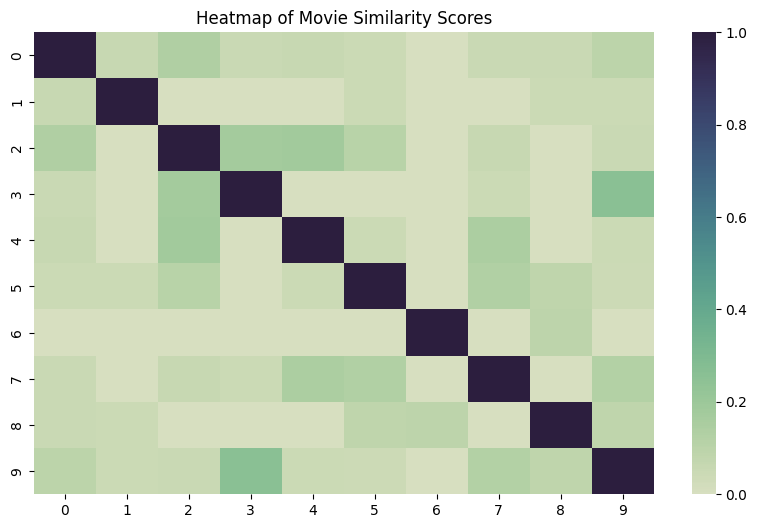

In [106]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.heatmap(cosine_sim[:10, :10], cmap=sns.cubehelix_palette(start=.5, rot=-.75, as_cmap=True))
plt.title("Heatmap of Movie Similarity Scores")
plt.show()

In [107]:
indices = pd.Series(movies.index, index=movies.movie_title)
print(indices)

movie_title
avatar                                         0
pirates of the caribbean: at world's end       1
spectre                                        2
the dark knight rises                          3
john carter                                    4
                                            ... 
el mariachi                                 4798
newlyweds                                   4799
signed, sealed, delivered                   4800
shanghai calling                            4801
my date with drew                           4802
Length: 4803, dtype: int64


In [108]:
indices = pd.Series(movies_df.index, index=movies_df.movie_title).drop_duplicates()
print(indices.head())

movie_title
Avatar                                      0
Pirates of the Caribbean: At World's End    1
Spectre                                     2
The Dark Knight Rises                       3
John Carter                                 4
dtype: int64


In [109]:
print(indices['Avatar'])

0


In [110]:
idx = indices['Spectre']
print(idx)

2


In [111]:
movie_index_score = list(enumerate(cosine_sim[1]))
movie_index_score=sorted(movie_index_score, key=lambda x: x[1], reverse=True)
movie_index_score = movie_index_score[1:11]
movies_indices = [ind[0] for ind in movie_index_score]
rec_movies = movies['movie_title'].iloc[movies_indices]
print(rec_movies)

12             pirates of the caribbean: dead man's chest
199     pirates of the caribbean: the curse of the bla...
17            pirates of the caribbean: on stranger tides
2155                                      the world's end
403                                      last action hero
607                 sky captain and the world of tomorrow
1649                                        the new world
508                         the lost world: jurassic park
3055            seeking a friend for the end of the world
1331                                         nim's island
Name: movie_title, dtype: object


In [112]:
print(movies.iloc[1])

movie_title             pirates of the caribbean: at world's end
cast           [captain jack sparrow, will turner, elizabeth ...
keywords                      [ocean, drug abuse, exotic island]
genres                              [adventure, fantasy, action]
director                                          gore verbinski
soup           pirates of the caribbean: at world's end gore ...
Name: 1, dtype: object


In [113]:
def get_recommendations(title, cosine_sim=cosine_sim):
    index_value_of_the_movie = indices[title]
    similarity_scores = list(enumerate(cosine_sim[index_value_of_the_movie]))
    similarity_scores= sorted(similarity_scores, key=lambda x: x[1], reverse=True)
    similarity_scores= similarity_scores[:11]
    # (a, b) where a is id of movie, b is similarity_scores

    movies_indices = [ind[0] for ind in similarity_scores]
    rec_movies = movies_df['movie_title'].iloc[movies_indices]
    return rec_movies


print("################ Content Based System #############")
print("Recommendations for The Dark Knight Rises")
print(get_recommendations("The Dark Knight Rises", cosine_sim))
print()
print("Recommendations for Avengers")
print(get_recommendations("Avatar", cosine_sim))

################ Content Based System #############
Recommendations for The Dark Knight Rises
3                         The Dark Knight Rises
65                              The Dark Knight
119                               Batman Begins
3854    Batman: The Dark Knight Returns, Part 2
299                              Batman Forever
210                              Batman & Robin
4267                                     Batman
1359                                     Batman
3966                                Point Blank
4638                   Amidst the Devil's Wings
9            Batman v Superman: Dawn of Justice
Name: movie_title, dtype: object

Recommendations for Avengers
0                           Avatar
661     Zathura: A Space Adventure
1531                     Moonraker
2966         2001: A Space Odyssey
2258                      Steamboy
1652          Dragonball Evolution
549                         Sphere
585                      War Horse
336      The Spiderwick Chronicles


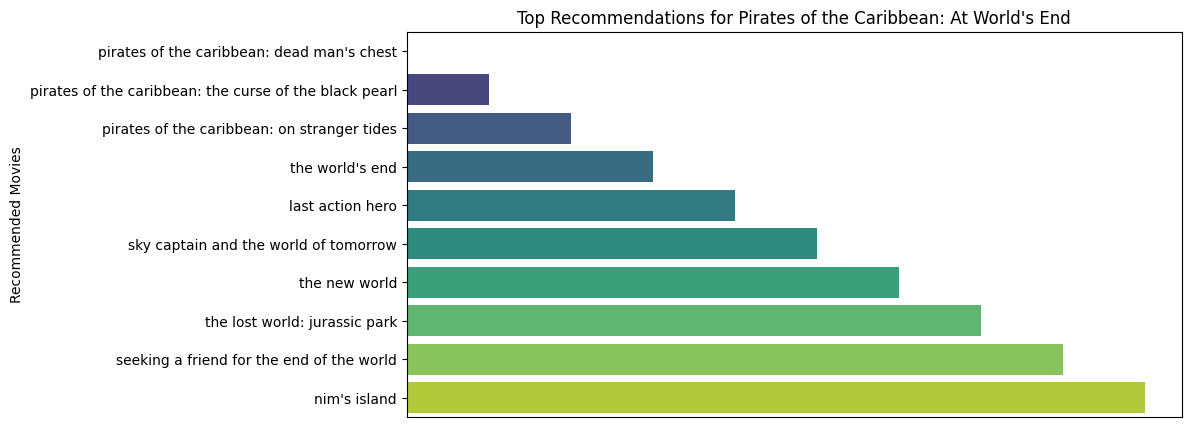

In [114]:
plt.figure(figsize=(10, 5))
sns.barplot(y=rec_movies, x=[i for i in range(len(rec_movies))], hue=rec_movies, palette='viridis', legend=False)
plt.xticks([])
plt.ylabel("Recommended Movies")
plt.title(f"Top Recommendations for {movies_df.iloc[1].movie_title}")
plt.show()